#### Import packages

In [11]:
using Printf
using Plots
using LaTeXStrings
include("../code/regression.jl")
include("utils_franke.jl")

create_markdown_table (generic function with 1 method)

#### Franke function

Note that the default GR backend of Plots.jl does not adjust the axis positions when changing the camera view of 3d surface plots. Emulating camera rotation can be achieved with the following steps:
- Transposing the z matrix
- Reversing the y vector
- Interchanging the x and y axes labels

##### Standard plot

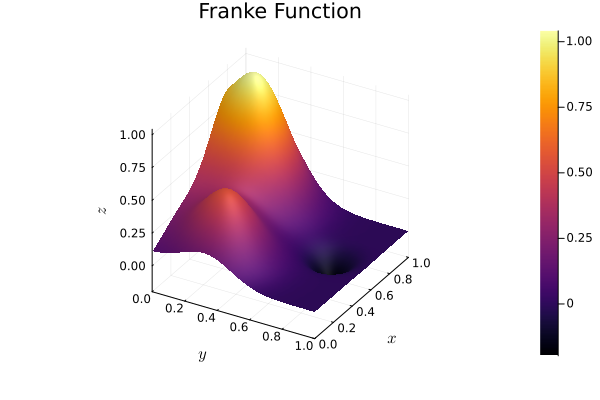

In [4]:
n = 100
x = range(0, 1, length=n)
y = range(0, 1, length=n)
z = franke.(x', y)

surface(x, reverse(y), z',
  xlabel=L"y", ylabel=L"x", zlabel=L"z", 
  title="Franke Function",
  camera=(30,30)
)
#savefig("franke.svg")

##### Noisy plot

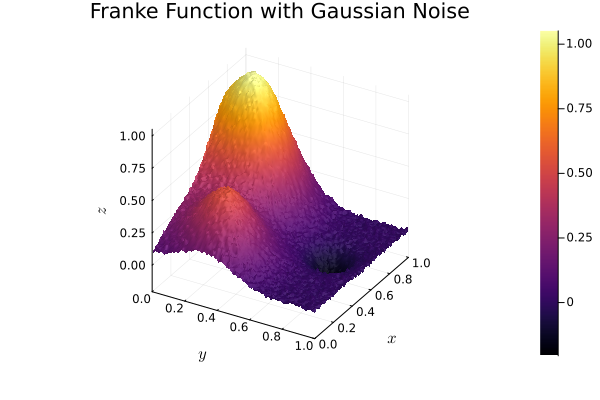

In [132]:
noise_amplitude = 0.01
z_noisy = z .+ randn(size(z)) .* noise_amplitude

surface(x, reverse(y), z_noisy',
  xlabel=L"y", ylabel=L"x", zlabel=L"z", 
  title="Franke Function with Gaussian Noise",
  camera=(30,30)
)

#### Polynomial ordinary least squares regression

The following is a script for plotting MSE and $R^2$-score of polynomial regression using OLS on training data generated by a noisy Franke function.

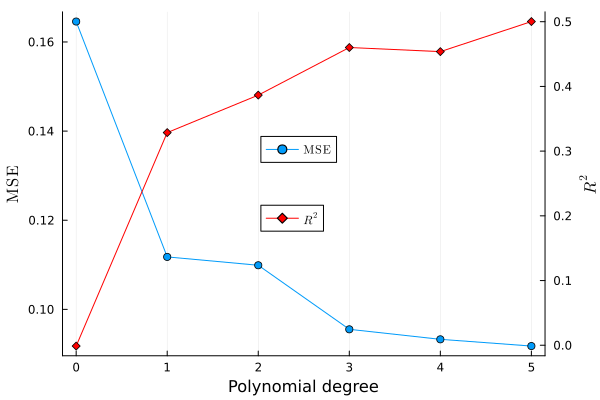

In [58]:

noise_amplitude = 0.3
train_ratio = 0.8
degrees = 5
random_inputs = false

samples = 100
mse, R2, coefficients = evaluate_ols(samples, noise_amplitude, train_ratio, degrees, random_inputs)

plot_mse_r2(degrees, mse, R2)

##### Bootstrap of OLS

The following script performs a bootstrap resampling of polynomial OLS regression on 100 samples generated by the Franke function.

In [6]:
trails = 100
sample_size = [10, 100, 10, 100] # scales as n^2
noise_amplitudes = [0.05, 0.05, 0.5, 0.5]
train_ratio = 0.8
degrees = 8
random_inputs = false

plots = []

degree_range = 0:degrees
for (sample, noise) in zip(sample_size, noise_amplitudes)
  mse, R2, coefficients = bootstrap_ols(trails, sample, noise, train_ratio, degrees, random_inputs)
  plot_ = plot(
    degree_range, mse,
    label=L"\mathrm{MSE}", legend=(0.5, 0.6),
    xlabel="Polynomial degree", ylabel=L"\mathrm{MSE}",
    title="Sample: $(Int(sample^2)), Noise: $noise",
    marker=:circle
  )
  plot!(
    twinx(), degree_range, R2,
    label=L"R^2", legend=legend=(0.5, 0.4),
    ylabel=L"R^2",
    xticks=xticks,
    marker=:diamond,
    color=:red
  )
  push!(plots, plot_)
end

plot(plots..., layout=(2,2), plot_title="Polynomial OLS Regression", size=(800, 800))

Script for plotting regression coefficients

In [102]:
trails = 100
sample_size = 100 # scales as n^2
noise_amplitude = 0.5
train_ratio = 0.8
degrees = 5
random_inputs = false

mse, R2, coefficients = bootstrap_ols(trails, sample_size, noise_amplitude, train_ratio, degrees, random_inputs)
plot_coefficients(coefficients, 0.1, "Polynomial OLS Regression Coefficients", "ols_franke_bootstrap_coefficients.svg")

"c:\\Users\\danfy\\Documents\\Projects\\fys-stk4155\\project_1\\code\\ols_franke_bootstrap_coefficients.svg"

#### Polynomial ridge regression

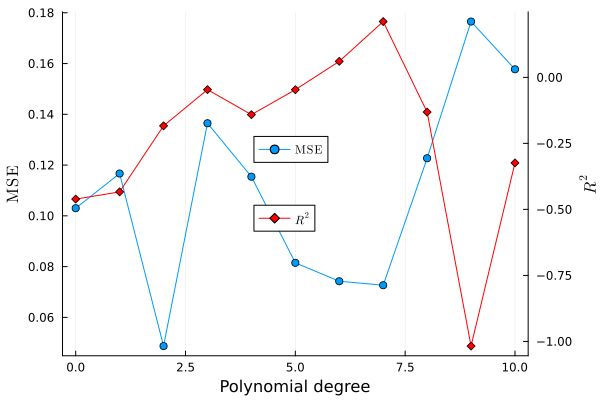

In [25]:
samples = 10
noise_amplitude = 0.1
train_ratio = 0.8
degrees = 10
random_inputs = false

λ = 1e3

mse, R2, coefficients = evaluate_ridge(samples, noise_amplitude, train_ratio, degrees, λ)
plot_mse_r2(degrees, mse, R2)

Script implementing bootstrap resampling with ridge regression

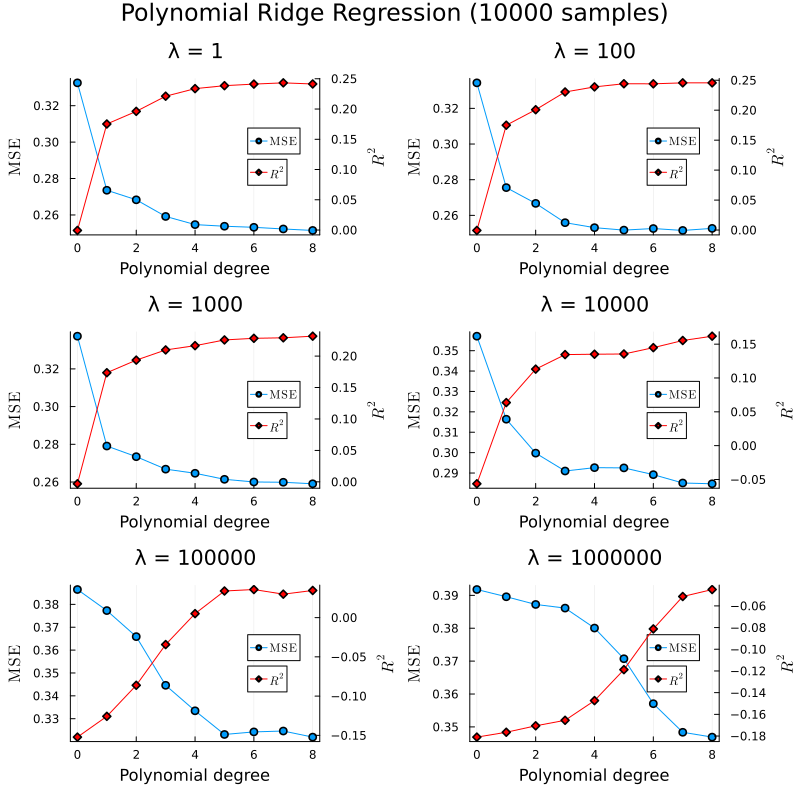

In [10]:
trails = 100
samples = 100
noise_amplitude = 0.5
train_ratio = 0.8
degrees = 8
random_inputs = false

lambdas = [1. 100. 1e3 1e4 1e5 1e6]

plots = []
degree_range = 0:degrees

for λ in lambdas
  mse, R2, coefficients = bootstrap_ridge(trails, samples, noise_amplitude, train_ratio, degrees, λ)
  plot_ = plot(
    degree_range, mse, 
    marker=:circle,
    label=L"\mathrm{MSE}",
    xlabel="Polynomial degree",
    ylabel=L"\mathrm{MSE}", 
    title="λ = $(Int(λ))",
    legend=(0.8, 0.6)
  )
  plot!(twinx(), degree_range, R2, marker=:diamond, label=L"R^2", ylabel=L"R^2", color=:red, legend=(0.8, 0.4))
  push!(plots, plot_)
end

plot(plots..., layout=(3,2), plot_title="Polynomial Ridge Regression ($(Int(samples^2)) samples)", size=(800, 800))

In [106]:
trails = 100
samples = 100
noise_amplitude = 0.1
train_ratio = 0.8
degrees = 5
λ = 10000.
random_inputs = false

mse, R2, coefficients = bootstrap_ridge(trails, samples, noise_amplitude, train_ratio, degrees, λ)
plot_coefficients(coefficients, 0.5, "Ridge Regression Coefficients (λ = $(Int(λ)))", "ridge_franke_bootstrap_coefficients.svg")

"c:\\Users\\danfy\\Documents\\Projects\\fys-stk4155\\project_1\\code\\ridge_franke_bootstrap_coefficients.svg"

##### LASSO regression

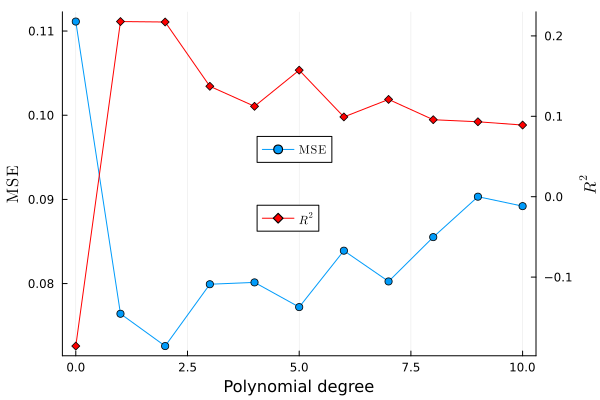

In [11]:
samples = 100
noise_amplitude = 0.1
train_ratio = 0.8
degrees = 10
random_inputs = false

λ = 1e3

mse, R2, coefficients = evaluate_lasso(samples, noise_amplitude, train_ratio, degrees, λ)
plot_mse_r2(degrees, mse, R2)

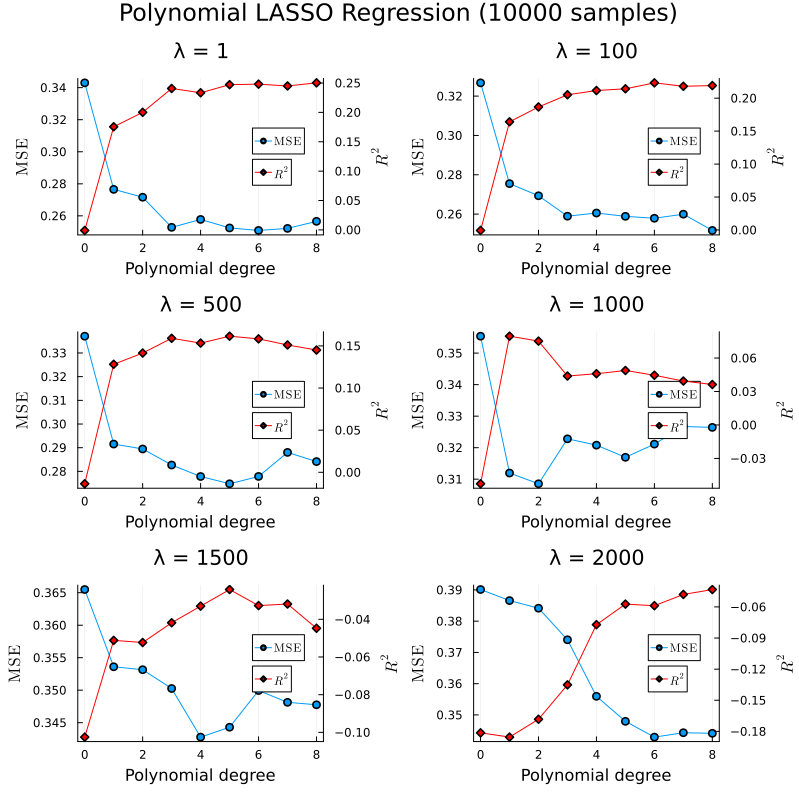

In [4]:
trails = 10 # bootstrap is slow
samples = 100
noise_amplitude = 0.5
train_ratio = 0.8
degrees = 8
random_inputs = false

lambdas = [1. 100. 500. 1e3 1.5e3 2e3]

plots = []
degree_range = 0:degrees

for λ in lambdas
  mse, R2, coefficients = bootstrap_lasso(trails, samples, noise_amplitude, train_ratio, degrees, λ)
  plot_ = plot(
    degree_range, mse, 
    marker=:circle,
    label=L"\mathrm{MSE}",
    xlabel="Polynomial degree",
    ylabel=L"\mathrm{MSE}", 
    title="λ = $(Int(λ))",
    legend=(0.8, 0.6)
  )
  plot!(twinx(), degree_range, R2, marker=:diamond, label=L"R^2", ylabel=L"R^2", color=:red, legend=(0.8, 0.4))
  push!(plots, plot_)
end

plot(plots..., layout=(3,2), plot_title="Polynomial LASSO Regression ($(Int(samples^2)) samples)", size=(800, 800))

In [5]:
savefig("lasso_franke_bootstrap_mse_r2.svg")

"c:\\Users\\danfy\\Documents\\Projects\\fys-stk4155\\project_1\\code\\lasso_franke_bootstrap_mse_r2.svg"

In [9]:
trails = 100
samples = 100
noise_amplitude = 0.1
train_ratio = 0.8
degrees = 5
λ = 750.
random_inputs = false

mse, R2, coefficients = bootstrap_lasso(trails, samples, noise_amplitude, train_ratio, degrees, λ)
plot_coefficients(coefficients, 0.5, "LASSO Regression Coefficients (λ = $(Int(λ)))", "lasso_franke_bootstrap_coefficients.svg")

"c:\\Users\\danfy\\Documents\\Projects\\fys-stk4155\\project_1\\code\\lasso_franke_bootstrap_coefficients.svg"

#### Bias-Variance Tradeoff

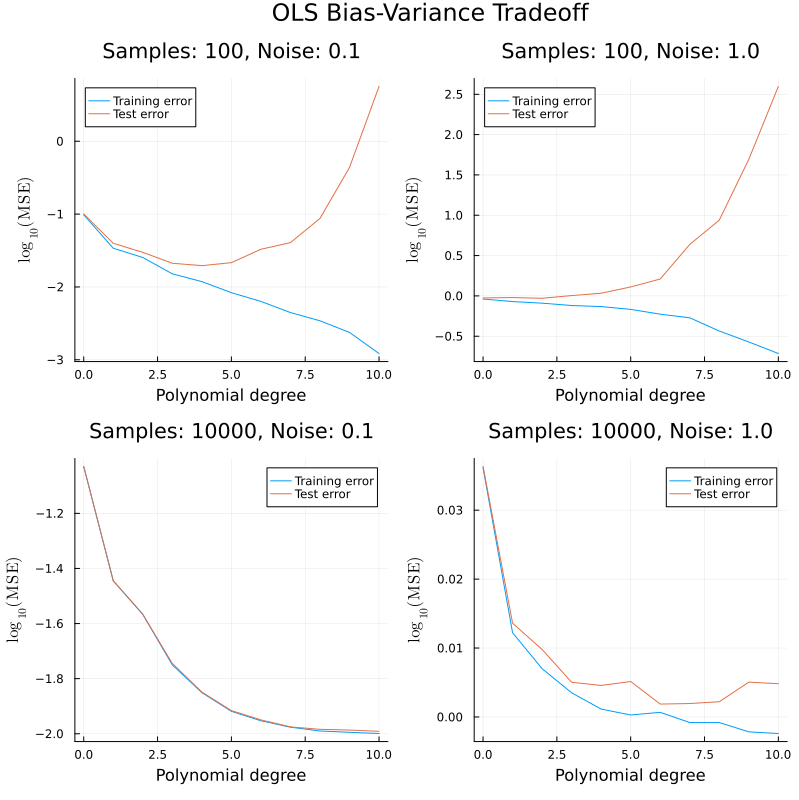

In [23]:
trials = 100
samples = [10, 10, 100, 100]
noise_amplitude = [0.1, 1., 0.1, 1.]
train_ratio = 0.8
degrees = 10
random_inputs = false

plots = []

degrees_range = 0:degrees

for (s, n) in zip(samples, noise_amplitude)
  test_error, train_error = bias_variance_ols(trials, s, n, train_ratio, degrees, random_inputs)
  plot_ = plot(degrees_range, log10.(train_error), 
    label="Training error", xlabel="Polynomial degree", 
    ylabel=L"\log_{10}(\mathrm{MSE})", 
    title="Samples: $(Int(s^2)), Noise: $(n)")
  plot!(degrees_range, log10.(test_error), label="Test error")
  push!(plots, plot_)
end

plot(plots..., layout=(2,2), plot_title="OLS Bias-Variance Tradeoff", size=(800, 800))


#### Cross-valiation

##### OLS

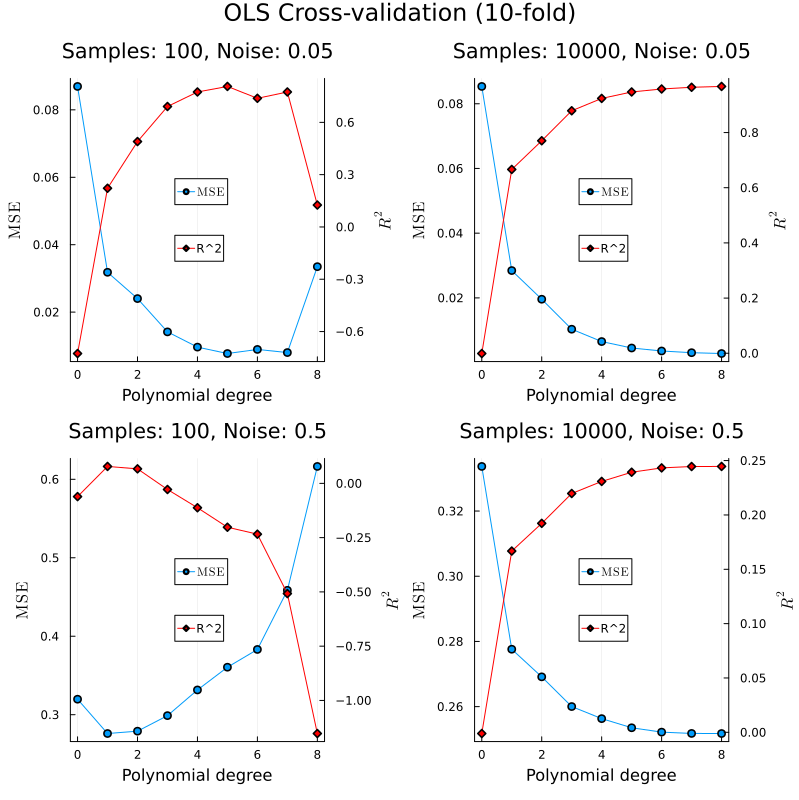

In [187]:
folds = 10
samples = [10, 100, 10, 100]
noise_amplitude = [0.05, 0.05, 0.5, 0.5]
degrees = 8
random_inputs = false

degree_range = 0:degrees
plots = []
for (s, n) in zip(samples, noise_amplitude)
  mse, r2 = cross_validation_ols(folds, s, degrees, n, random_inputs)
  plot_ = plot(
    degree_range, mse, 
    marker=:circle, 
    label=L"\mathrm{MSE}",  legend=(0.5, 0.6),
    title="Samples: $(Int(s^2)), Noise: $(n)",
    xlabel="Polynomial degree", 
    ylabel=L"\mathrm{MSE}",)
  plot!(
    twinx(), degree_range, r2,
    marker=:diamond, color=:red, 
    label="R^2", legend=(0.5, 0.4),
    ylabel=L"R^2")
  push!(plots, plot_)
end

plot(plots..., layout=(2,2), plot_title="OLS Cross-validation ($(folds)-fold)", size=(800, 800))


In [188]:
savefig("ols_franke_cross_validation_mse_r2.svg")

"c:\\Users\\danfy\\Documents\\Projects\\fys-stk4155\\project_1\\calc\\ols_franke_cross_validation_mse_r2.svg"

##### Ridge

In [209]:
folds = 10
samples = 100
noise_amplitude = 0.5
degrees = 8
random_inputs = false

lambdas = [1. 100. 1e3 1e4 1e5 1e6]

degree_range = 0:degrees

plots = []
for λ in lambdas
  mse, r2 = cross_validation_ridge(folds, samples, degrees, λ, noise_amplitude, random_inputs)
  plot_ = plot(
    degree_range, mse, 
    marker=:circle,
    title="λ = $(Int(λ))",
    label=L"\mathrm{MSE}", legend=(0.8, 0.6),
    xlabel="Polynomial degree", ylabel=L"\mathrm{MSE}")
  plot!(
    twinx(), degree_range, r2, 
    marker=:diamond, color=:red, 
    label=L"R^2", legend=(0.8, 0.4),
    ylabel=L"R^2")
  push!(plots, plot_)
end

plot(plots..., layout=(3,2), plot_title="Ridge Cross-Validation ($(folds)-fold)", size=(800,800))
savefig("ridge_franke_cross_validation_mse_r2.svg")


"c:\\Users\\danfy\\Documents\\Projects\\fys-stk4155\\project_1\\calc\\ridge_franke_cross_validation_mse_r2.svg"

#### LASSO

In [210]:
folds = 10
samples = 100
noise_amplitude = 0.5
degrees = 8
random_inputs = false

lambdas = [1. 100. 500. 1e3 1.5e3 2e3]

degree_range = 0:degrees

plots = []
for λ in lambdas
  mse, r2 = cross_validation_lasso(folds, samples, degrees, λ, noise_amplitude, random_inputs)
  plot_ = plot(
    degree_range, mse, 
    marker=:circle,
    title="λ = $(Int(λ))",
    label=L"\mathrm{MSE}", legend=(0.8, 0.6),
    xlabel="Polynomial degree", ylabel=L"\mathrm{MSE}")
  plot!(
    twinx(), degree_range, r2, 
    marker=:diamond, color=:red, 
    label=L"R^2", legend=(0.8, 0.4),
    ylabel=L"R^2")
  push!(plots, plot_)
end

plot(plots..., layout=(3,2), plot_title="LASSO Cross-Validation ($(folds)-fold)", size=(800,800))
savefig("lasso_franke_cross_validation_mse_r2.svg")


"c:\\Users\\danfy\\Documents\\Projects\\fys-stk4155\\project_1\\calc\\lasso_franke_cross_validation_mse_r2.svg"

#### Comparison of models

Script for comparing performance of OLS, ridge and LASSO. The script finds the polynomial degree with best from the OLS. Then ridge and LASSO regression is applied to find the optimal $\lambda$ for the same degree

-- OLS --
Samples = 100
Noise = 0.2
Polynomial degree = 3
MSE = 5.39e-02 ± 2.44e-02
R^2 = 2.80e-01 ± 7.24e-01

-- Ridge --
Samples = 100
Noise = 0.2
Polynomial degree = 8
λ = 4.75e+01 
MSE = 7.54e-02 ± 4.52e-02
R^2 = 2.65e-01 ± 3.55e-01

-- LASSO --
Samples = 100
Noise = 0.2
Polynomial degree = 8
λ = 1.00e-01 
MSE = 6.58e-02 ± 1.79e-02
R^2 = -1.59e-01 ± 1.53e+00


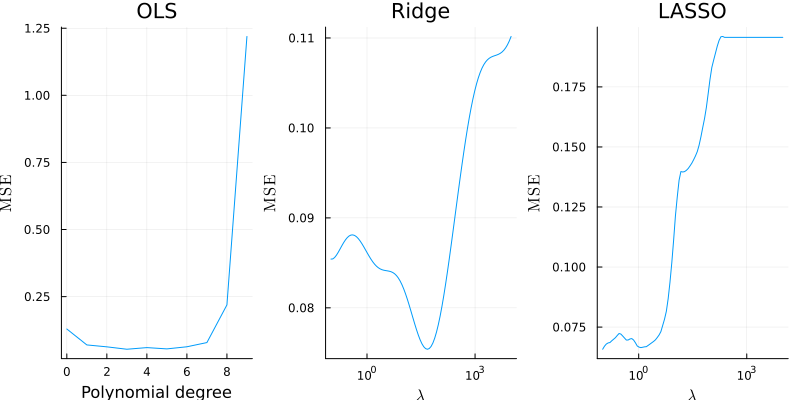

In [5]:
Random.seed!(0)

folds = 10
samples = 10
noise_amplitude = 0.2
degrees = 9
random_inputs = false

lambdas = 10 .^ range(-1, 4, length=100)

# OLS
mse_ols, r2_ols = cross_validation_ols(folds, samples, degrees, noise_amplitude, random_inputs)

mse_ols_mean = mean(mse_ols, dims=2)
mse_ols_std = std(mse_ols, dims=2)
mse_ols_idx = argmin(mse_ols_mean)

r2_ols_mean = mean(r2_ols, dims=2)
r2_ols_std = std(r2_ols, dims=2)


# Ridge
degree = mse_ols_idx[1] * 2
mse_ridge, r2_ridge = ridge_optimize_lambda(lambdas, folds, samples, degree, noise_amplitude, random_inputs)

mse_ridge_mean = mean(mse_ridge, dims=2)
mse_ridge_std = std(mse_ridge, dims=2)
mse_ridge_idx = argmin(mse_ridge_mean)

r2_ridge_mean = mean(r2_ridge, dims=2)
r2_ridge_std = std(r2_ridge, dims=2)

# LASSO
mse_lasso, r2_lasso = lasso_optimize_lambda(lambdas, folds, samples, degree, noise_amplitude, random_inputs)

mse_lasso_mean = mean(mse_lasso, dims=2)
mse_lasso_std = std(mse_lasso, dims=2)
mse_lasso_idx = argmin(mse_lasso_mean)

r2_lasso_mean = mean(r2_lasso, dims=2)
r2_lasso_std = std(r2_lasso, dims=2)

# Result

println("""
-- OLS --
Samples = $(Int(samples^2))
Noise = $(noise_amplitude)
Polynomial degree = $(mse_ols_idx[1] - 1)
MSE = $(@sprintf("%.2e", mse_ols_mean[mse_ols_idx])) ± $(@sprintf("%.2e", mse_ols_std[mse_ols_idx]))
R^2 = $(@sprintf("%.2e", r2_ols_mean[mse_ols_idx])) ± $(@sprintf("%.2e", r2_ols_std[mse_ols_idx]))
""")

 println("""
-- Ridge --
Samples = $(Int(samples^2))
Noise = $(noise_amplitude)
Polynomial degree = $(degree)
λ = $(@sprintf("%.2e", lambdas[mse_ridge_idx])) 
MSE = $(@sprintf("%.2e", mse_ridge_mean[mse_ridge_idx])) ± $(@sprintf("%.2e", mse_ridge_std[mse_ridge_idx]))
R^2 = $(@sprintf("%.2e", r2_ridge_mean[mse_ridge_idx])) ± $(@sprintf("%.2e", r2_ridge_std[mse_ridge_idx]))
""")

println("""
-- LASSO --
Samples = $(Int(samples^2))
Noise = $(noise_amplitude)
Polynomial degree = $(degree)
λ = $(@sprintf("%.2e", lambdas[mse_lasso_idx])) 
MSE = $(@sprintf("%.2e", mse_lasso_mean[mse_lasso_idx])) ± $(@sprintf("%.2e", mse_lasso_std[mse_lasso_idx]))
R^2 = $(@sprintf("%.2e", r2_lasso_mean[mse_lasso_idx])) ± $(@sprintf("%.2e", r2_lasso_std[mse_lasso_idx]))""")

p1 = plot(0:degrees, mse_ols_mean, 
  xlabel="Polynomial degree", ylabel=L"\mathrm{MSE}",
  title="OLS", legend=false)
p2 = plot(lambdas, mse_ridge_mean,
  xaxis=:log,
  xlabel=L"\lambda", ylabel=L"\mathrm{MSE}",  
  title="Ridge", legend=false)
p3 = plot(lambdas, mse_lasso_mean,
  xaxis=:log,
  xlabel=L"\lambda", ylabel=L"\mathrm{MSE}", 
  title="LASSO", legend=false)

plot(p1, p2, p3, layout=(1,3), size=(800, 400))

-- Polynomial regression --
Samples = 100
Noise = 0.1

-- OLS --
Polynomial degree = 5
MSE = 1.87e-02 ± 8.65e-03
R^2 = 6.79e-01 ± 2.56e-01

-- Ridge --
Polynomial degree = 7
λ = 100.0 
MSE = 4.30e-02 ± 2.34e-02
R^2 = 4.40e-01 ± 2.58e-01

-- LASSO --
Polynomial degree = 3
λ = 1.0 
MSE = 2.36e-02 ± 1.63e-02
R^2 = 6.58e-01 ± 2.11e-01


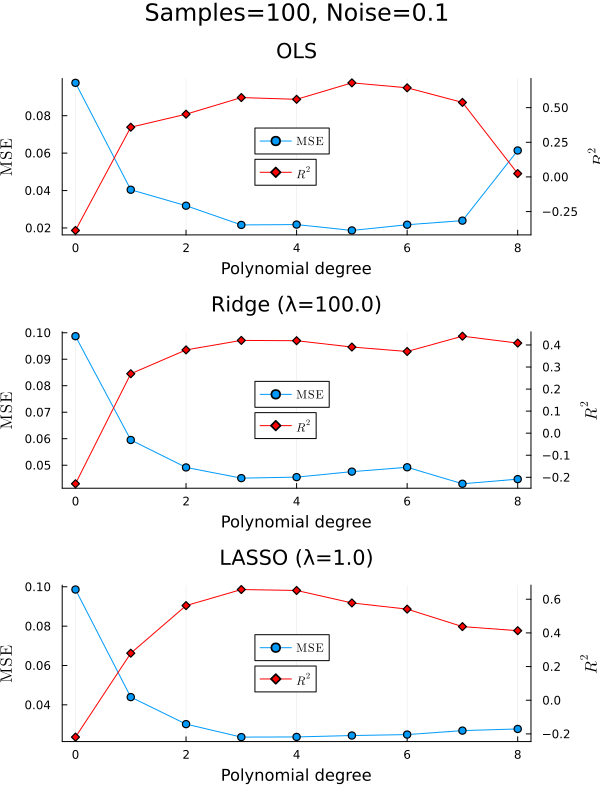

In [44]:
Random.seed!(0)

fold = 10
samples = 10
degrees = 8
noise_amplitude = 0.1
λ_ridge = 100.
λ_lasso = 1.

# OLS
mse_ols, r2_ols = cross_validation_ols(fold, samples, degrees, noise_amplitude, false, random_inputs)

mse_ols_mean = mean(mse_ols, dims=2)
mse_ols_std = std(mse_ols, dims=2)
mse_ols_idx = argmin(mse_ols_mean)

r2_ols_mean = mean(r2_ols, dims=2)
r2_ols_std = std(r2_ols, dims=2)

# Ridge
mse_ridge, r2_ridge = cross_validation_ridge(fold, samples, degrees, λ_ridge, noise_amplitude, false, random_inputs)

mse_ridge_mean = mean(mse_ridge, dims=2)
mse_ridge_std = std(mse_ridge, dims=2)
mse_ridge_idx = argmin(mse_ridge_mean)

r2_ridge_mean = mean(r2_ridge, dims=2)
r2_ridge_std = std(r2_ridge, dims=2)

# LASSO
mse_lasso, r2_lasso = cross_validation_lasso(fold, samples, degrees, λ_lasso, noise_amplitude, false, random_inputs)

mse_lasso_mean = mean(mse_lasso, dims=2)
mse_lasso_std = std(mse_lasso, dims=2)
mse_lasso_idx = argmin(mse_lasso_mean)

r2_lasso_mean = mean(r2_lasso, dims=2)
r2_lasso_std = std(r2_lasso, dims=2)

# Result

println("""
-- Polynomial regression --
Samples = $(Int(samples^2))
Noise = $(noise_amplitude)
""")

println("""
-- OLS --
Polynomial degree = $(mse_ols_idx[1] - 1)
MSE = $(@sprintf("%.2e", mse_ols_mean[mse_ols_idx])) ± $(@sprintf("%.2e", mse_ols_std[mse_ols_idx]))
R^2 = $(@sprintf("%.2e", r2_ols_mean[mse_ols_idx])) ± $(@sprintf("%.2e", r2_ols_std[mse_ols_idx]))
""")

 println("""
-- Ridge --
Polynomial degree = $(mse_ridge_idx[1] - 1)
λ = $(λ_ridge) 
MSE = $(@sprintf("%.2e", mse_ridge_mean[mse_ridge_idx])) ± $(@sprintf("%.2e", mse_ridge_std[mse_ridge_idx]))
R^2 = $(@sprintf("%.2e", r2_ridge_mean[mse_ridge_idx])) ± $(@sprintf("%.2e", r2_ridge_std[mse_ridge_idx]))
""")

println("""
-- LASSO --
Polynomial degree = $(mse_lasso_idx[1] - 1)
λ = $(λ_lasso) 
MSE = $(@sprintf("%.2e", mse_lasso_mean[mse_lasso_idx])) ± $(@sprintf("%.2e", mse_lasso_std[mse_lasso_idx]))
R^2 = $(@sprintf("%.2e", r2_lasso_mean[mse_lasso_idx])) ± $(@sprintf("%.2e", r2_lasso_std[mse_lasso_idx]))""")

degree_range = 0:degrees
p1 = plot(degree_range, mse_ols_mean, 
  marker=:circle, label=L"\mathrm{MSE}", legend=(0.5,0.6),
  xlabel="Polynomial degree", ylabel=L"\mathrm{MSE}", 
  title="OLS")
plot!(twinx(), degree_range, r2_ols_mean, 
  marker=:diamond, color=:red, legend=(0.5,0.4),
  label=L"R^2", ylabel=L"R^2"
)

p2 = plot(degree_range, mse_ridge_mean, 
  marker=:circle, label=L"\mathrm{MSE}", legend=(0.5,0.6),
  xlabel="Polynomial degree", ylabel=L"\mathrm{MSE}", 
  title="Ridge (λ=$(λ_ridge))")
plot!(twinx(), degree_range, r2_ridge_mean, 
  marker=:diamond, color=:red, legend=(0.5,0.4),
  label=L"R^2", ylabel=L"R^2"
)

p3 = plot(degree_range, mse_lasso_mean, 
  marker=:circle, label=L"\mathrm{MSE}", legend=(0.5,0.6),
  xlabel="Polynomial degree", ylabel=L"\mathrm{MSE}", 
  title="LASSO (λ=$(λ_lasso))")
plot!(twinx(), degree_range, r2_lasso_mean, 
  marker=:diamond, color=:red, legend=(0.5,0.4),
  label=L"R^2", ylabel=L"R^2"
)

plot(p1, p2, p3, layout=(3,1), size=(600, 800), 
  plot_title="Samples=$(Int(samples^2)), Noise=$(noise_amplitude)")


In [45]:
savefig("ols_ridge_lasso_franke_cross_validation_mse_r2.svg")

"c:\\Users\\danfy\\Documents\\Projects\\fys-stk4155\\project_1\\calc\\ols_ridge_lasso_franke_cross_validation_mse_r2.svg"